# Machine Learning Checkpoint  Supervised Learning

## using Kidney Diseases  dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
#loading data 
data = pd.read_csv('kidney_disease.csv')


In [4]:
data.shape

(400, 26)

In [5]:
#changing columns name
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# exploring the dataset
data.describe()

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Data Cleaning and Preprocessing 

In [7]:
data.isna().sum()

id                           0
age                          9
blood_pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [8]:
data.dtypes

id                           int64
age                        float64
blood_pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

### Label Encoding Categorical values and setting the correct type for each value 

Encoding categorical data

In [9]:
obj_colomns=  list(data.select_dtypes(include=['object']).head(0))
data[obj_colomns].head()

,red blood cells,pus cell,pus cell clumps,bacteria,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
obj_colomns.remove('packed cell volume')
obj_colomns.remove('white blood cell count')
obj_colomns.remove('red blood cell count' )
obj_colomns

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [11]:
for i in obj_colomns:
    data[i].fillna(data[i].mode()[0],inplace = True)

In [12]:
object_values =  pd.DataFrame(data[obj_colomns])
object_values

,red blood cells,pus cell,pus cell clumps,bacteria,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [13]:
data.dtypes

id                           int64
age                        float64
blood_pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [14]:
for i in obj_colomns :
    data[i] = data[i].astype('category').cat.codes
data[obj_colomns]

,red blood cells,pus cell,pus cell clumps,bacteria,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,1,1,0,0,1,4,1,0,0,0,0
1,1,1,0,0,0,3,1,0,0,0,0
2,1,1,0,0,0,4,1,1,0,1,0
3,1,0,1,0,1,3,1,1,1,1,0
4,1,1,0,0,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,3,1,0,0,0,2
396,1,1,0,0,0,3,1,0,0,0,2
397,1,1,0,0,0,3,1,0,0,0,2
398,1,1,0,0,0,3,1,0,0,0,2


Changing the type of strings that supposed to be ints or floats 

In [15]:
# removing the id column
data = data
data.drop("id",axis=1,inplace=True)

In [16]:
objs = ['packed cell volume','white blood cell count','red blood cell count']
data[objs]

,packed cell volume,white blood cell count,red blood cell count
0,44,7800,5.2
1,38,6000,NaN
2,31,7500,NaN
3,32,6700,3.9
4,35,7300,4.6
...,...,...,...
395,47,6700,4.9
396,54,7800,6.2
397,49,6600,5.4
398,51,7200,5.9


### Outliers and missing data 

In [17]:
# we will remove the rows that contains a nan age 
# cause the age an important factor in health of humans 
data=data.dropna(subset=['age'])
data['age'].isna().sum()

0

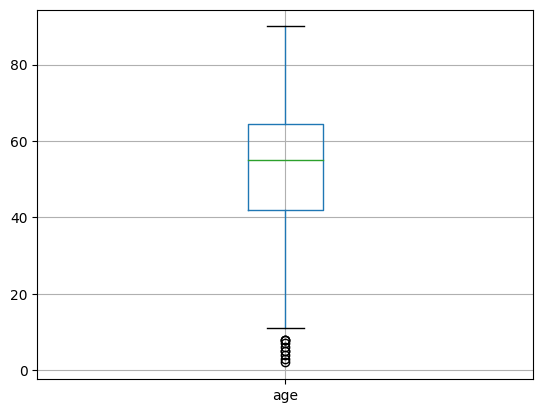

In [18]:
import matplotlib.pyplot as plot
age_b_plot = data.boxplot(column='age')
age_b_plot.plot()
plot.show()

In [19]:
# removing outliers in age values 
iqr = data['age'].quantile(0.75) - data['age'].quantile(0.25)
data = data.loc[((data['age'] >=  data['age'].quantile(0.25) - iqr *1.5 )) & (iqr *1.5 + data['age'].quantile(0.75) >= data['age']) ] # using the iqr formula 
data.shape


(381, 25)

In [20]:
data.isnull().sum()

age                          0
blood_pressure               7
specific gravity            43
albumin                     42
sugar                       45
red blood cells              0
pus cell                     0
pus cell clumps              0
bacteria                     0
blood glucose random        37
blood urea                  18
serum creatinine            16
sodium                      79
potassium                   80
hemoglobin                  48
packed cell volume          64
white blood cell count      96
red blood cell count       115
hypertension                 0
diabetes mellitus            0
coronary artery disease      0
appetite                     0
pedal edema                  0
anemia                       0
class                        0
dtype: int64

Treating the rest of missing values 

Replacing missing values on columns which have less of them

In [21]:
# using the median cause it less effected by outliers 
data.loc[(data['blood_pressure'].isnull() == True), 'blood_pressure'] = data['blood_pressure'].median()

data.loc[(data['specific gravity'].isnull() == True), 'specific gravity'] = data['specific gravity'].median()

data.loc[(data['albumin'].isnull() == True), 'albumin'] = data['albumin'].median()

data.loc[(data['sugar'].isnull() == True), 'sugar'] = data['sugar'].median()

data.loc[(data['blood glucose random'].isnull() == True), 'blood glucose random'] = data['blood glucose random'].median()

data.loc[(data['blood urea'].isnull() == True), 'blood urea'] = data['blood urea'].median()

data.loc[(data['serum creatinine'].isnull() == True), 'serum creatinine'] = data['serum creatinine'].median()

data.loc[(data['hemoglobin'].isnull() == True), 'hemoglobin'] = data['hemoglobin'].median()

In [22]:

data['white blood cell count'] = pd.to_numeric(data['white blood cell count'])

data['red blood cell count'].replace('\t?',np.nan,inplace=True)
data['red blood cell count'] = data['red blood cell count'].astype('float64')

data['packed cell volume'].replace('\t?',np.nan,inplace=True)
data['packed cell volume'] = data['packed cell volume'].astype('float64')

In [23]:
data.dtypes

age                        float64
blood_pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells               int8
pus cell                      int8
pus cell clumps               int8
bacteria                      int8
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension                  int8
diabetes mellitus             int8
coronary artery disease       int8
appetite                      int8
pedal edema                   int8
anemia                        int8
class                         int8
dtype: object

In [24]:
data.isnull().sum()

age                          0
blood_pressure               0
specific gravity             0
albumin                      0
sugar                        0
red blood cells              0
pus cell                     0
pus cell clumps              0
bacteria                     0
blood glucose random         0
blood urea                   0
serum creatinine             0
sodium                      79
potassium                   80
hemoglobin                   0
packed cell volume          65
white blood cell count      96
red blood cell count       116
hypertension                 0
diabetes mellitus            0
coronary artery disease      0
appetite                     0
pedal edema                  0
anemia                       0
class                        0
dtype: int64

### Treating the attributes which has a lot of missing values    

In [25]:
# separating attribute that has missing values and the rest 
att=dict(data.isnull().sum())

def has_nulls(pair):
    key,value = pair
    return value >0

def no_nulls(pair):
    key,value = pair
    return value == 0

missing = dict(filter(has_nulls,att.items()))
missing = list(missing.keys())

completed = dict(filter(no_nulls,att.items()))
completed = list(completed.keys())
completed.remove('class')

missing

['sodium',
 'potassium',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

finding Correlation between features 

In [26]:
correlations = pd.DataFrame(columns=completed,index=missing)
for i in missing:
    for j in completed:
        corr = data[i].corr(data[j])
        correlations[j].loc[i] = corr if corr > 0  else -1 # only positive values the rest is not important 
correlations

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
sodium,-1,-1,0.252206,-1,-1,0.164285,0.203372,-1,-1,-1,-1,-1,0.358327,-1,-1,-1,-1,-1,-1
potassium,0.052673,0.07288,-1,0.134829,0.216755,0.024072,-1,-1,-1,0.065739,0.361176,0.328644,-1,0.063956,0.072518,0.00468,-1,0.070406,0.119622
packed cell volume,-1,-1,0.530991,-1,-1,0.296004,0.458458,-1,-1,-1,-1,-1,0.890482,-1,-1,-1,-1,-1,-1
white blood cell count,0.172363,0.048999,-1,0.237367,0.197666,0.017253,-1,0.200322,0.084614,0.155227,0.054958,0.001966,-1,0.163819,0.153503,0.011177,0.174446,0.201427,0.058314
red blood cell count,-1,-1,0.526738,-1,-1,0.282739,0.480569,-1,-1,-1,-1,-1,0.789957,-1,-1,-1,-1,-1,-1


**Visualizing the relationship with variables using a scatter plot**

In [27]:
import matplotlib.pyplot as plt

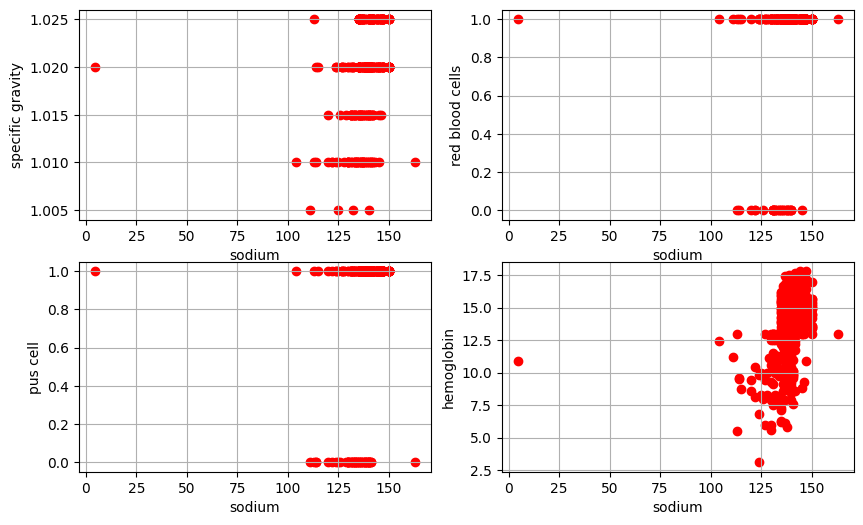

In [28]:
plt.rcParams["figure.figsize"] = (10,6)
k = 1
for i in completed:
    if correlations[i].loc['sodium'] > 0.1:
        plt.subplot(2,2,k)
        k+=1
        x1=data['sodium']
        y1=data[i]
        plt.xlabel('sodium')
        plt.ylabel(i)
        plt.scatter(x1,y1,c='r')
        plt.grid()
plt.show()

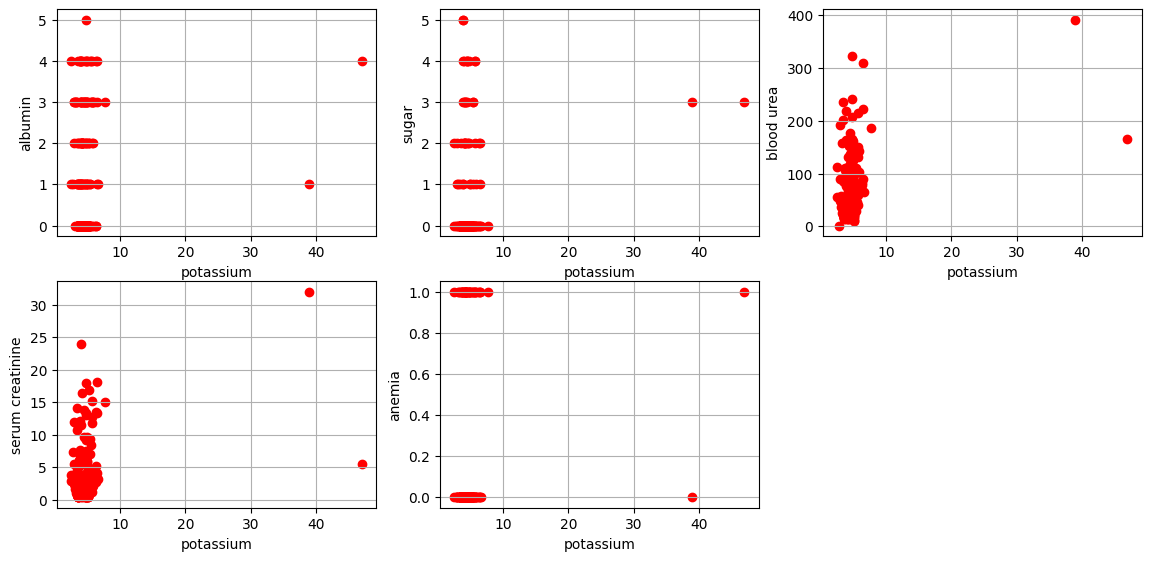

In [29]:
plt.rcParams["figure.figsize"] = (14,10)
k = 1
for i in completed:
    if correlations[i].loc['potassium'] > 0.1:
        plt.subplot(3,3,k)
        k+=1
        x1=data['potassium']
        y1=data[i]
        plt.xlabel('potassium')
        plt.ylabel(i)
        plt.scatter(x1,y1,c='r')
        plt.grid()
plt.show()

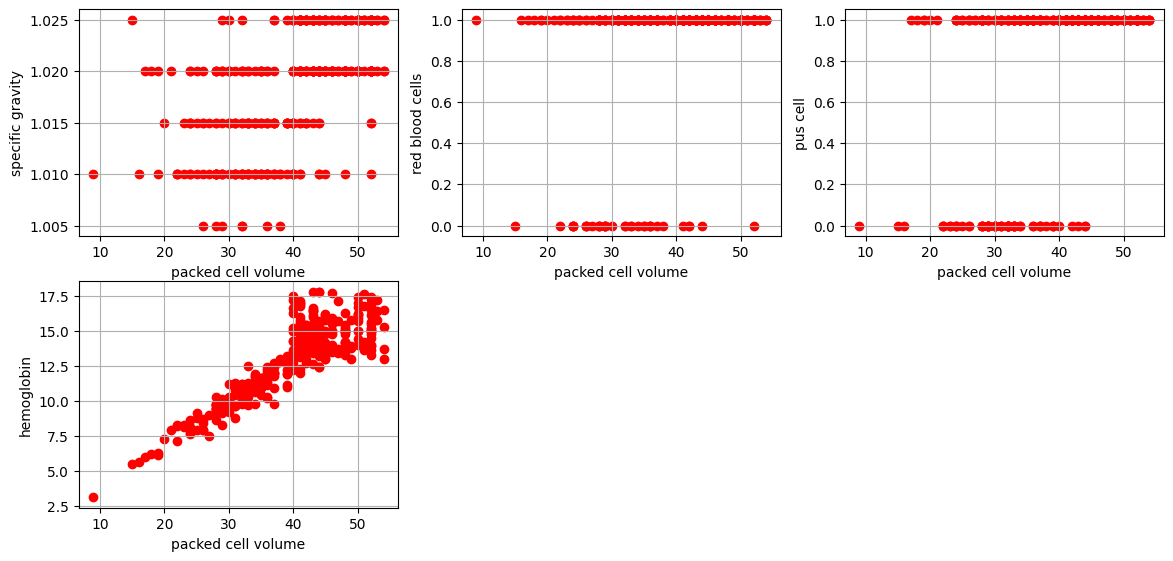

In [30]:
plt.rcParams["figure.figsize"] = (14,10)
k = 1
for i in completed:
    if correlations[i].loc['packed cell volume'] > 0.1:
        plt.subplot(3,3,k)
        k+=1
        x1=data['packed cell volume']
        y1=data[i]
        plt.xlabel('packed cell volume')
        plt.ylabel(i)
        plt.scatter(x1,y1,c='r')
        plt.grid()
plt.show()

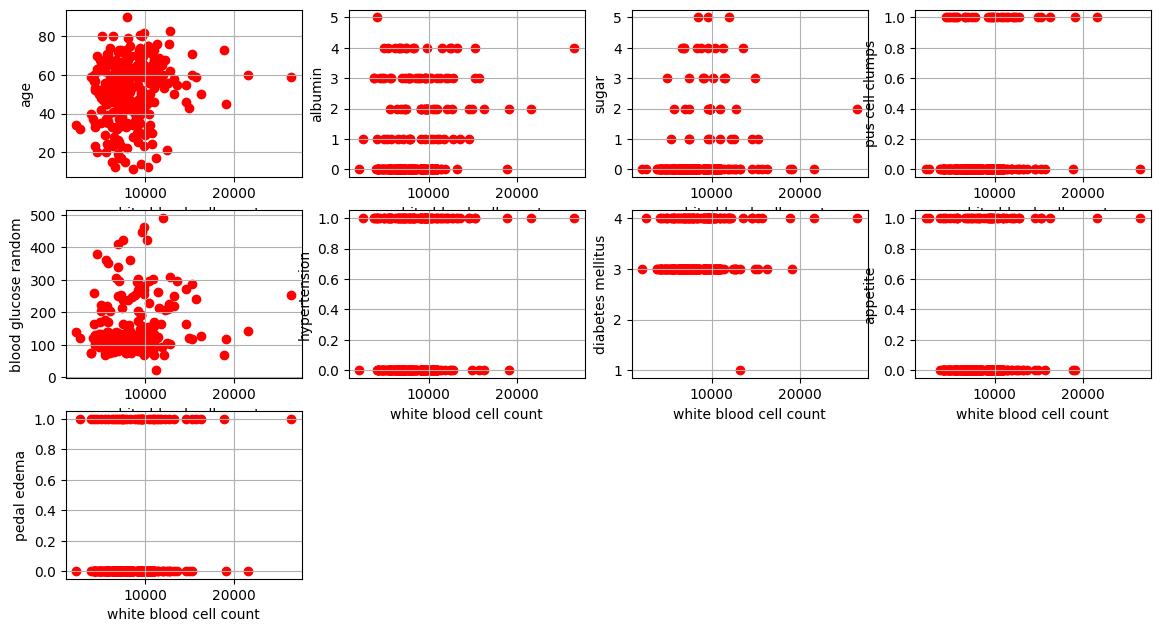

In [31]:
plt.rcParams["figure.figsize"] = (14,10)
k = 1
for i in completed:
    if correlations[i].loc['white blood cell count'] > 0.1:
        plt.subplot(4,4,k)
        k+=1
        x1=data['white blood cell count']
        y1=data[i]
        plt.xlabel('white blood cell count')
        plt.ylabel(i)
        plt.scatter(x1,y1,c='r')
        plt.grid()
plt.show()

White blood cells has little to no correlation with the rest of the data set features 

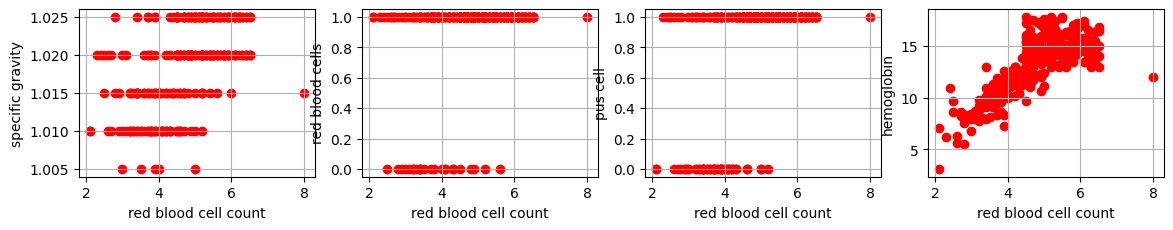

In [32]:
plt.rcParams["figure.figsize"] = (14,10)
k = 1
for i in completed:
    if correlations[i].loc['red blood cell count'] > 0.1:
        plt.subplot(4,4,k)
        k+=1
        x1=data['red blood cell count']
        y1=data[i]
        plt.xlabel('red blood cell count')
        plt.ylabel(i)
        plt.scatter(x1,y1,c='r')
        plt.grid()
plt.show()

In [33]:
# replacing the white blood cell missing values with median cause it has a weak correlation with the rest of the data set
data.loc[(data['white blood cell count'].isnull() == True), 'white blood cell count'] = data['white blood cell count'].median()

Using miss forest to fill the missing values 

In [34]:
import miceforest as mf

In [37]:
kernel = mf.ImputationKernel(
  datasets=4,
  data=data,
  save_all_iterations=True,
  random_state=1991
)
kernel.mice(3)

In [38]:
kernel


              Class: ImputationKernel
           Datasets: 4
         Iterations: 3
       Data Samples: 381
       Data Columns: 25
  Imputed Variables: 4
save_all_iterations: True

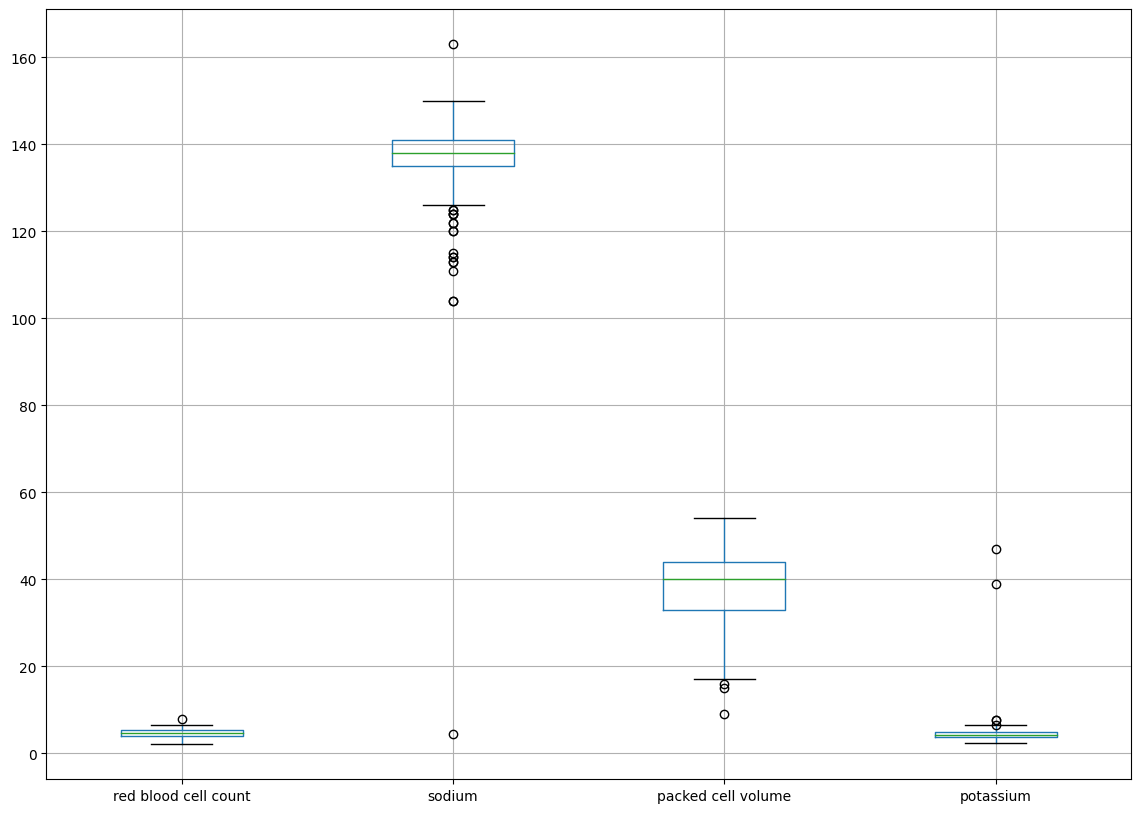

In [92]:
processed_data= kernel.complete_data()
processed_data.boxplot(column=['red blood cell count','sodium', 'packed cell volume','potassium'])
plot.show()

Sodium contain a lot of outliers 

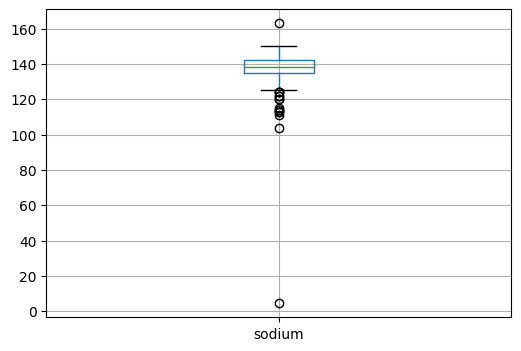

In [42]:
# comparing with the original data set that contain missing values for sodium
data.boxplot('sodium',figsize=(6,4))
plot.show()

So even the older data contains a lot of outliers so we don't need to change it

In [43]:
#saving the processed data into a csv file 
processed_data.to_csv('processed_kidney_disease.csv')

## Applying logistic regression 

In [44]:
# to split the data
from sklearn.model_selection import train_test_split

In [63]:
x = processed_data.loc[:, processed_data.columns != 'class']
y = processed_data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Training the model

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()  
model.fit(x_train,y_train) 

/home/ahmed/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_pred = model.predict(x_test)

Checking the score of the result 

In [55]:
score = model.score(x_test,y_test)
score

0.8174603174603174

### confusion Matrix 

In [56]:
from sklearn import metrics

In [58]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[58, 15],
       [ 8, 45]])

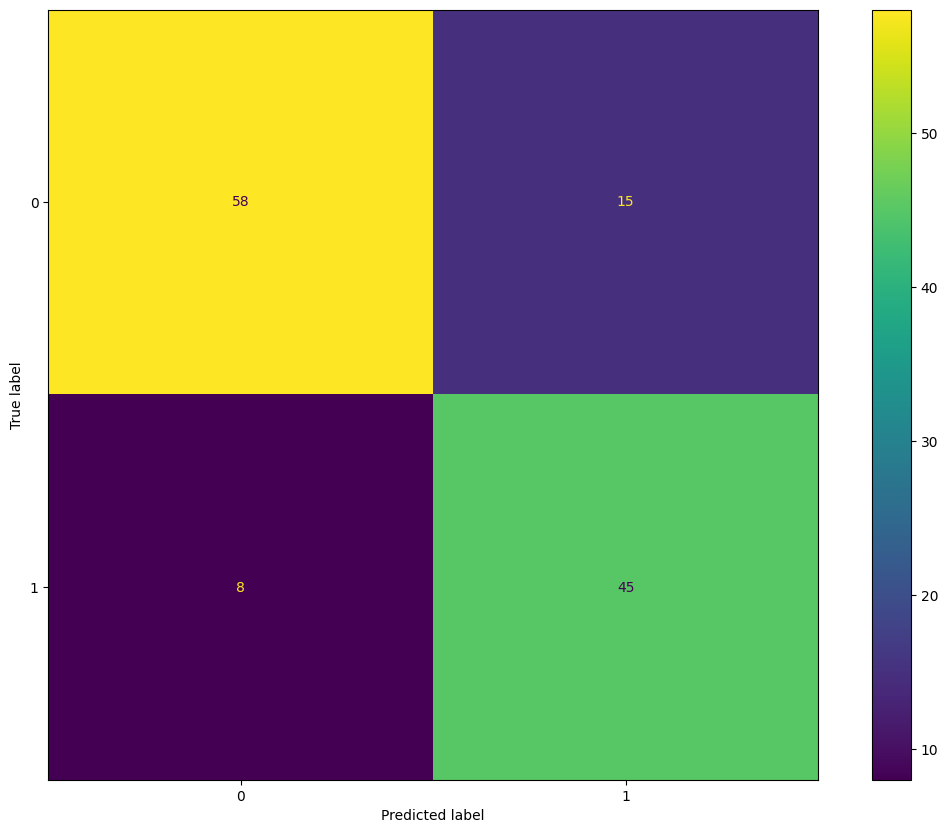

In [61]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Applying KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# trying different number of neighbors 
range_of_neighbors = range(1,31)
scores = dict()
for i in range_of_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[i] = metrics.accuracy_score(y_test,y_pred)
scores

{1: 0.7142857142857143,
 2: 0.6190476190476191,
 3: 0.7063492063492064,
 4: 0.6507936507936508,
 5: 0.6904761904761905,
 6: 0.6587301587301587,
 7: 0.6587301587301587,
 8: 0.6746031746031746,
 9: 0.6825396825396826,
 10: 0.6825396825396826,
 11: 0.7063492063492064,
 12: 0.7301587301587301,
 13: 0.7222222222222222,
 14: 0.7142857142857143,
 15: 0.7222222222222222,
 16: 0.7301587301587301,
 17: 0.6904761904761905,
 18: 0.7222222222222222,
 19: 0.7698412698412699,
 20: 0.753968253968254,
 21: 0.7222222222222222,
 22: 0.7301587301587301,
 23: 0.6666666666666666,
 24: 0.6904761904761905,
 25: 0.6507936507936508,
 26: 0.6904761904761905,
 27: 0.6428571428571429,
 28: 0.6984126984126984,
 29: 0.6666666666666666,
 30: 0.6666666666666666}

In [70]:
max_s = 0
max_n = -1
for i in scores.items():
    k,v = i
    if v > max_s:
        max_s = v
        max_n = k
(max_n,max_s)

(19, 0.7698412698412699)

We notice that we got the best score of 19 neighbors and it's close to 0.77 

## Applying Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
#training 
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [74]:
y_pred = clf_gini.predict(x_test)

In [76]:
from sklearn import tree

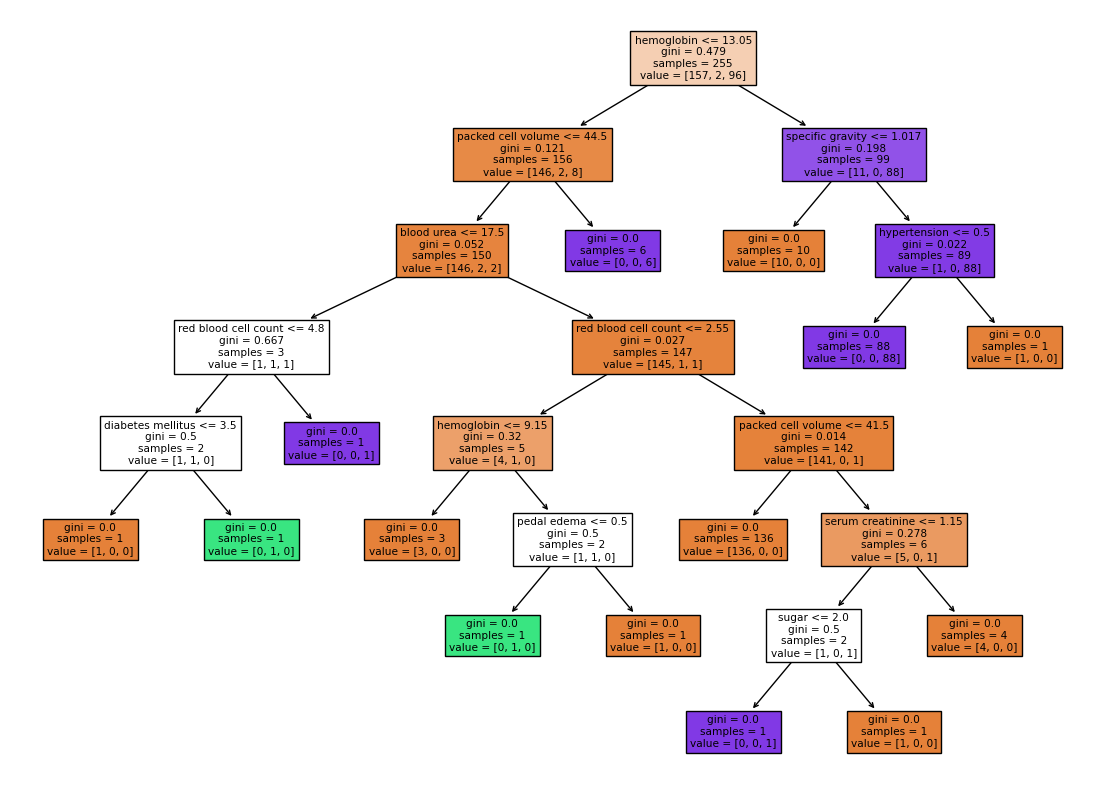

In [83]:
_=tree.plot_tree(clf_gini,feature_names= processed_data.columns,filled=True)
plt.show()

In [75]:
score =  metrics.accuracy_score(y_test,y_pred)
score

0.9682539682539683

## Applying Random Forests 

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [86]:
y_pred = rf.predict(x_test)

In [87]:
score = metrics.accuracy_score(y_test,y_pred)
score

0.9920634920634921

In [88]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[72,  1],
       [ 0, 53]])

# Machine Learning Checkpoint  Unsupervised Learning

In [93]:
processed_data.drop('class',inplace=True,axis=1)
processed_data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,4,1,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,3.7,0,4,1,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,3,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,3,1,0,0,0
5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,74.0,...,12.2,39.0,7800.0,4.4,1,4,1,0,1,0


## Applying hierarchical clustering

Visualizing the distribution of categorical data 

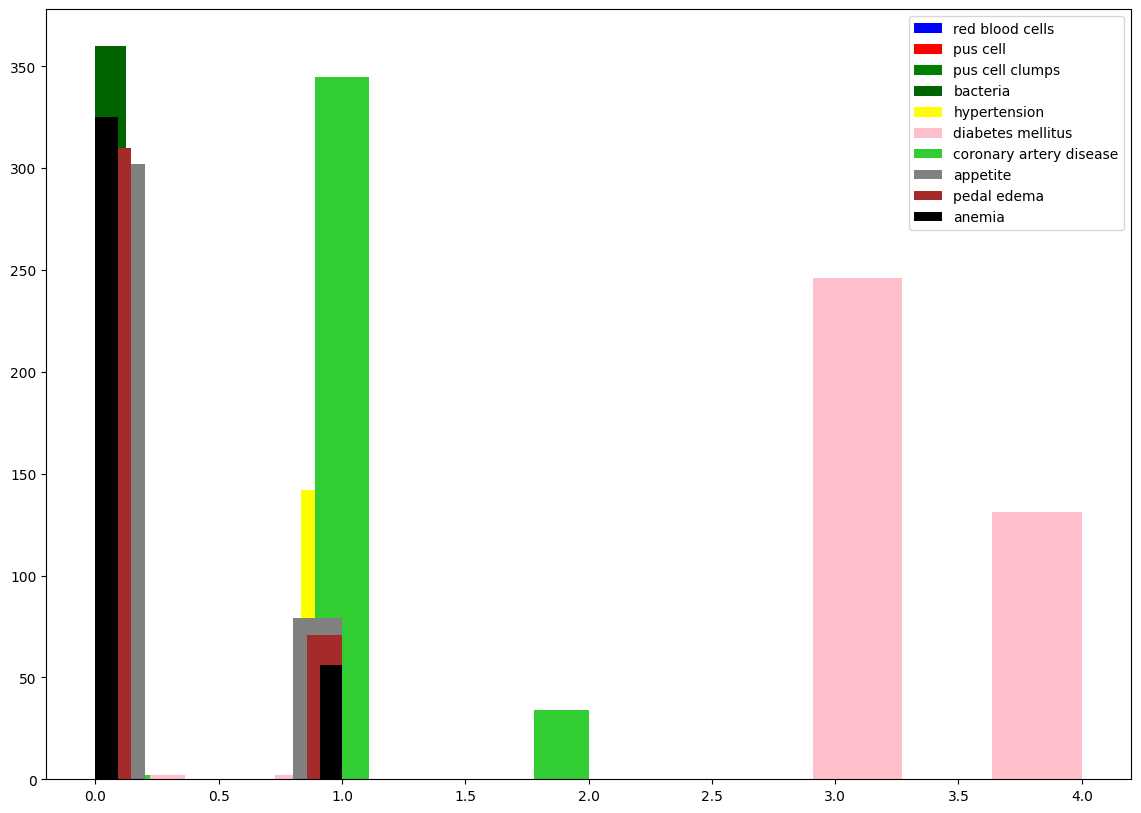

In [141]:
plt.hist(processed_data['red blood cells'],bins= 10,color='blue')
plt.hist(processed_data['pus cell'],bins=12,color='red')
plt.hist(processed_data['pus cell clumps'],bins=13,color='green')
plt.hist(processed_data['bacteria'],bins=8,color='darkgreen')
plt.hist(processed_data['hypertension'],bins=6,color='yellow')
plt.hist(processed_data['diabetes mellitus'],bins=11,color='pink')
plt.hist(processed_data['coronary artery disease'],bins=9,color='limegreen')
plt.hist(processed_data['appetite'],bins=5,color='grey')
plt.hist(processed_data['pedal edema'],bins=7,color='brown')
plt.hist(processed_data['anemia'],bins=11,color='black')
plt.legend(['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',])
plt.show()

we can expect that getting two clusters will be easy because the categorical data devise the rows into two 

In [121]:
# checking the age groups in a data set
intervals = [10,20,30,40,50,60,70,80,90]
processed_data['ages groups'] = pd.cut( x = processed_data['age'],bins=intervals)

In [124]:
processed_data.groupby('ages groups')['ages groups'].count()


ages groups
(10, 20]    13
(20, 30]    28
(30, 40]    40
(40, 50]    79
(50, 60]    89
(60, 70]    86
(70, 80]    42
(80, 90]     4
Name: ages groups, dtype: int64

We notice that most observation are older that 40

In [128]:
processed_data.drop('ages groups',axis=1,inplace=True)

Plotting each pair od data

### Visualizing Hierarchical Structure

In [138]:
import scipy.cluster.hierarchy as shc

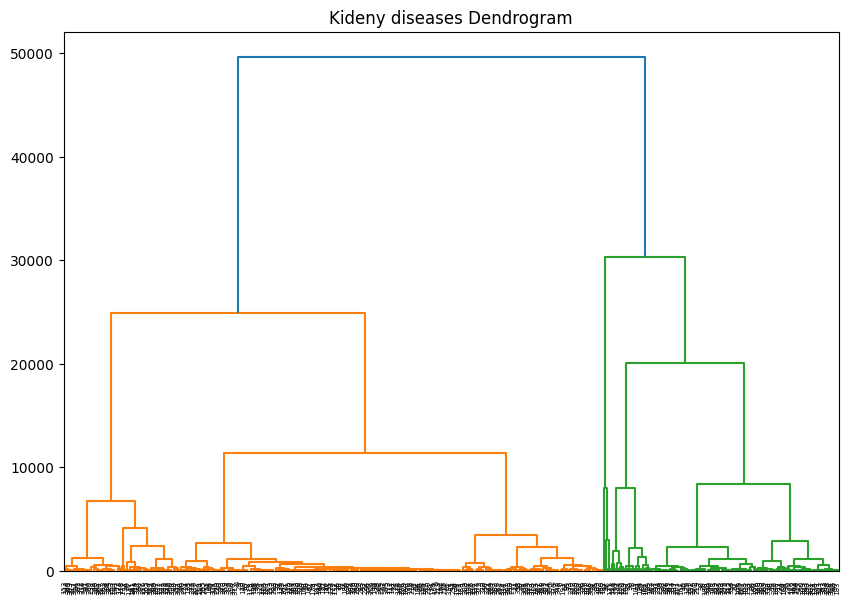

In [139]:
plt.figure(figsize=(10, 7))
plt.title("Kideny diseases Dendrogram")
clusters = shc.linkage(processed_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Training

In [142]:
from sklearn.cluster import AgglomerativeClustering

In [154]:
clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering_model.fit(processed_data)
clustering_model.labels_


array([0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 3, 4, 0, 1, 3, 0, 0, 1, 3, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 2, 2, 1, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 1, 3, 0, 0, 3, 0, 0, 3, 4, 0, 1, 4,
       3, 0, 4, 0, 0, 1, 3, 1, 0, 1, 0, 4, 0, 0, 0, 4, 1, 0, 1, 1, 1, 1,
       3, 0, 0, 0, 0, 0, 4, 3, 0, 0, 4, 3, 0, 4, 4, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 3, 0, 4, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 1, 1, 1, 3,
       0, 1, 0, 0, 3, 0, 1, 4, 4, 1, 0, 3, 4, 0, 1, 0, 0, 2, 0, 0, 3, 0,
       0, 3, 0, 0, 1, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 4, 1, 0, 0, 0, 3, 3, 0, 1,
       0, 0, 3, 3, 1, 1, 1, 0, 3, 0, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 0, 3,
       1, 3, 0, 0, 3, 1, 0, 1, 0, 0, 1, 3, 0, 0, 3, 3, 0, 1, 3, 0, 1, 3,
       1, 0, 3, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0,

In [149]:
import seaborn as sns

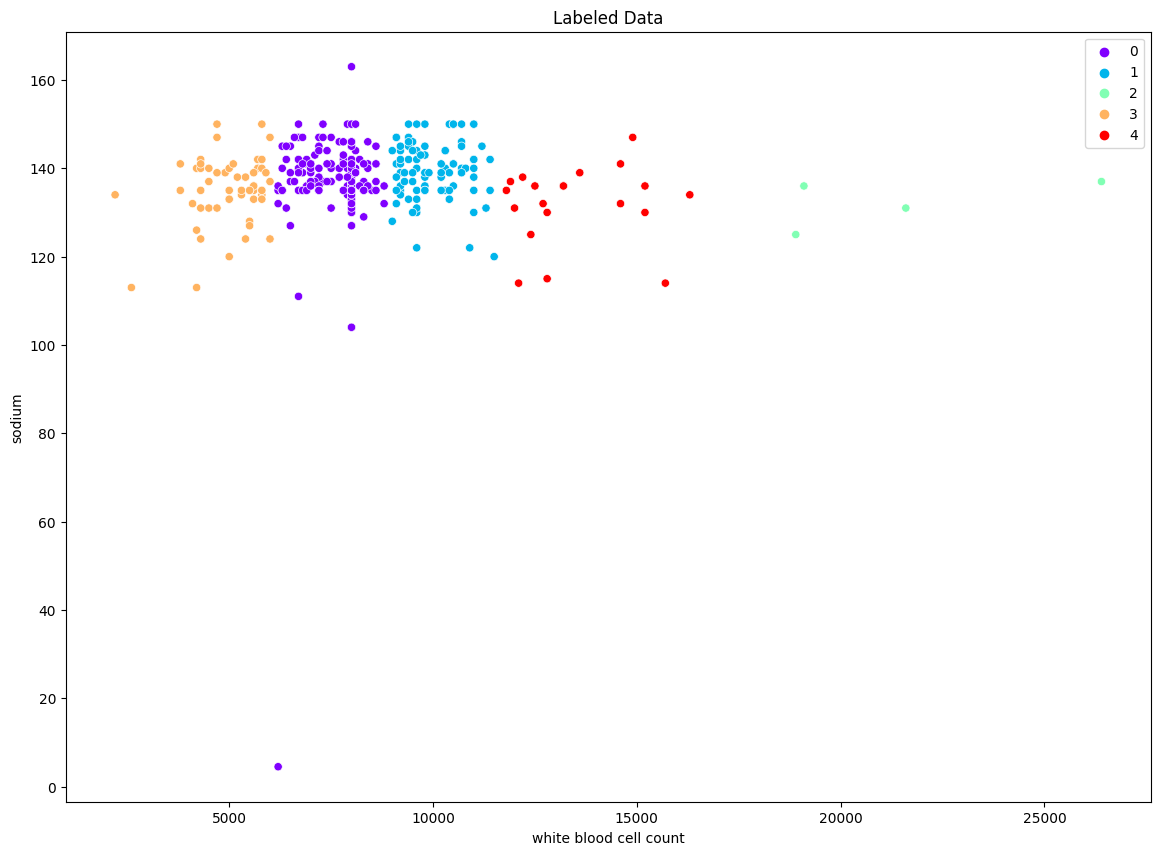

In [159]:
data_labels = clustering_model.labels_
sns.scatterplot(x='white blood cell count', 
                y='sodium', 
                data=processed_data, 
                hue=data_labels,
                palette='rainbow',
                ).set_title('Labeled Data')
plt.show()

In [160]:
from sklearn.metrics import silhouette_score

In [162]:
silhouette = silhouette_score(processed_data, clustering_model.labels_)
silhouette

0.6077691869470851

## Applying K-means Clustering 

In [163]:
from sklearn.cluster import KMeans

In [165]:
import warnings

In [169]:
# run block of code and catch warnings
with warnings.catch_warnings():
 # ignore all caught warnings
    warnings.filterwarnings("ignore")
 # execute code that will generate warnings
    max_score = -1 
    max = 10
    for i in range(2,10):
        model = KMeans(n_clusters = i)
        model.fit(processed_data)
        labels = model.fit_predict(processed_data)
        silhouette = silhouette_score(processed_data, model.labels_)
        if silhouette > max_score :
            max_score = silhouette
            max = i
        print("i = ",i,"score= ",silhouette)
    print("the best number of cluster is ", max)

i =  2 score=  0.5770556889625882
i =  3 score=  0.5724950457476597
i =  4 score=  0.6072470309495251
i =  5 score=  0.6202349827515278
i =  6 score=  0.6116140698266694
i =  7 score=  0.6147838283071293
i =  8 score=  0.6161934266905619
i =  9 score=  0.630778867524273
the best number of cluster is  9


In [ ]:
model.fit(processed_data)
labels = model.fit_predict(processed_data)

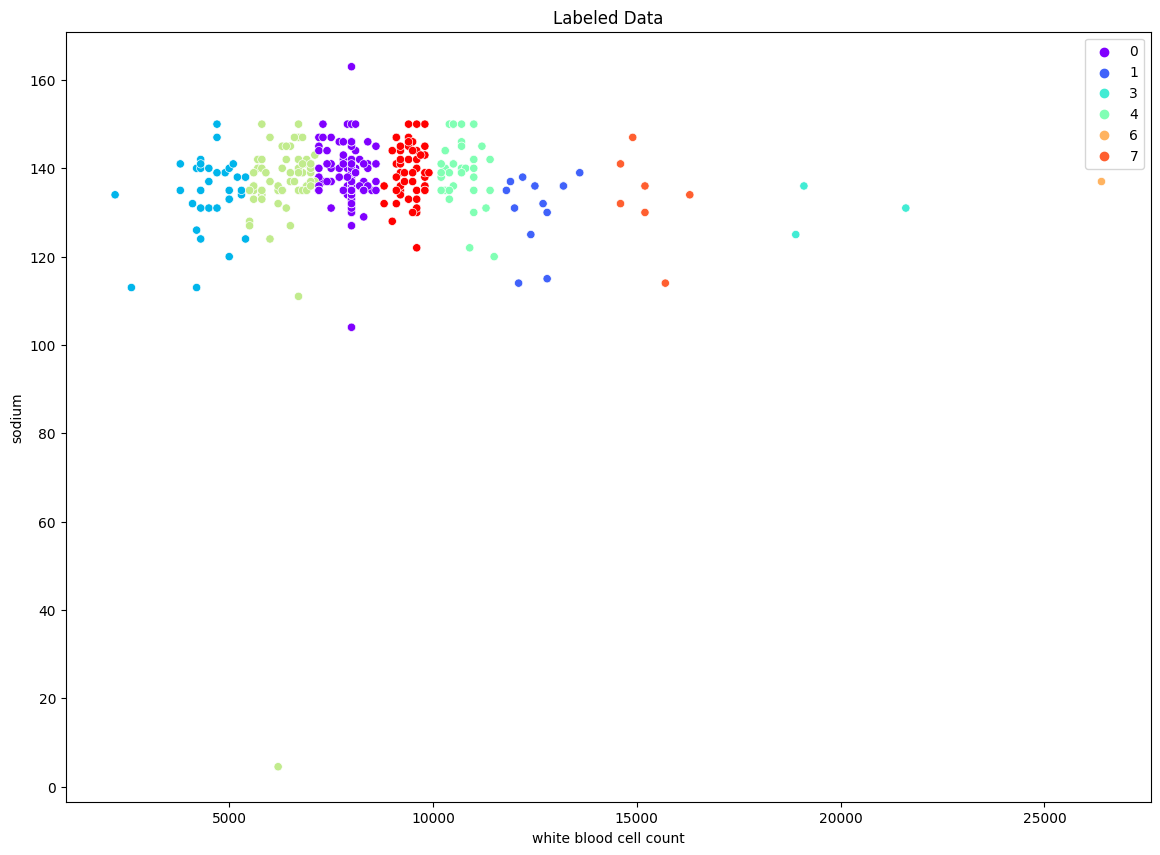

In [170]:
sns.scatterplot(x='white blood cell count', 
                y='sodium', 
                data=processed_data, 
                hue=labels,
                palette='rainbow',
                ).set_title('Labeled Data')
plt.show()